In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
B=pd.read_csv('/Users/apple/Downloads/My Files/My File/Bias/Bias_correction_ucl.csv')

In [3]:
B.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30/06/2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30/06/2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30/06/2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30/06/2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30/06/2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [42]:
Bd=pd.DataFrame(B)

In [43]:
Bd.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30/06/2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30/06/2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30/06/2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30/06/2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30/06/2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
B.shape

(7752, 25)

In [5]:
B.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [6]:
B.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [8]:
B.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
missing_values = B.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Missing Values']
missing_values['Percentage Missing'] = (missing_values['Missing Values'] / len(B)) * 100

In [10]:
missing_values

,Column,Missing Values,Percentage Missing
0,station,2,0.025800
1,Date,2,0.025800
2,Present_Tmax,70,0.902993
3,Present_Tmin,70,0.902993
4,LDAPS_RHmin,75,0.967492
5,LDAPS_RHmax,75,0.967492
6,LDAPS_Tmax_lapse,75,0.967492
7,LDAPS_Tmin_lapse,75,0.967492
8,LDAPS_WS,75,0.967492
9,LDAPS_LH,75,0.967492


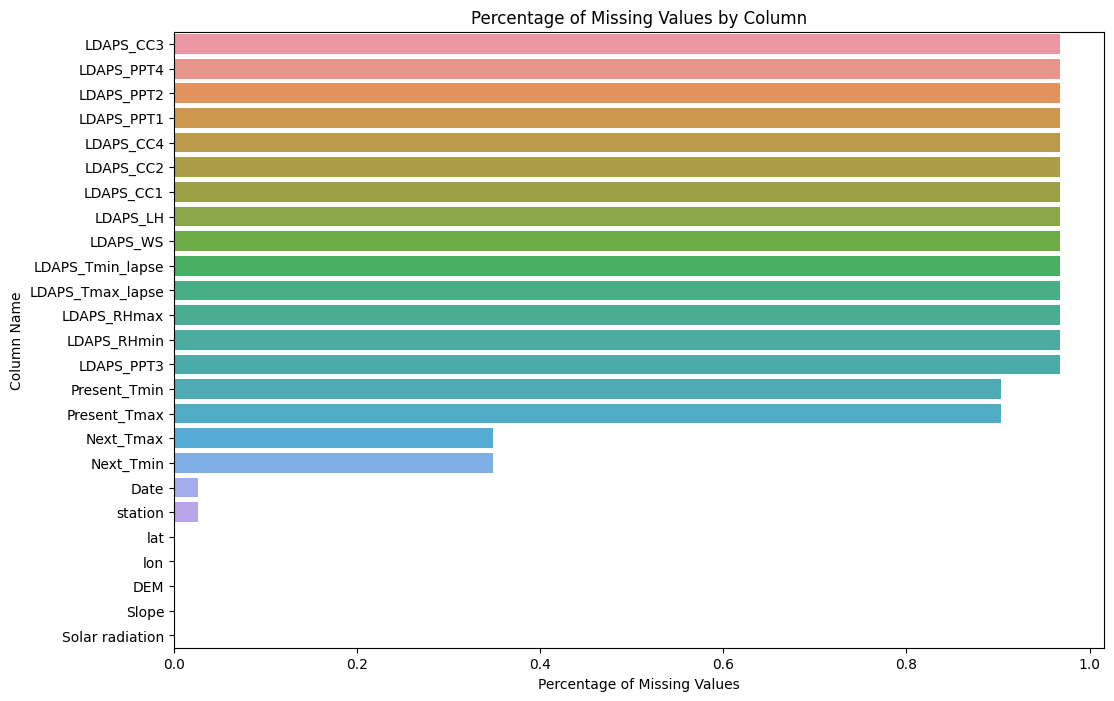

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage Missing', y='Column', data=missing_values.sort_values(by='Percentage Missing', ascending=False))
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column Name')
plt.show()

In [12]:
print(missing_values)

              Column  Missing Values  Percentage Missing
0            station               2            0.025800
1               Date               2            0.025800
2       Present_Tmax              70            0.902993
3       Present_Tmin              70            0.902993
4        LDAPS_RHmin              75            0.967492
5        LDAPS_RHmax              75            0.967492
6   LDAPS_Tmax_lapse              75            0.967492
7   LDAPS_Tmin_lapse              75            0.967492
8           LDAPS_WS              75            0.967492
9           LDAPS_LH              75            0.967492
10         LDAPS_CC1              75            0.967492
11         LDAPS_CC2              75            0.967492
12         LDAPS_CC3              75            0.967492
13         LDAPS_CC4              75            0.967492
14        LDAPS_PPT1              75            0.967492
15        LDAPS_PPT2              75            0.967492
16        LDAPS_PPT3           

In [13]:
Columns_drop=missing_values[missing_values['Percentage Missing']>90]['Column'].tolist()

In [14]:
print(Columns_drop)

[]


In [15]:
B_cleaned =B.drop(columns=Columns_drop)

In [16]:
print(B_cleaned)

      station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30/06/2013          28.7          21.4    58.255688   
1         2.0  30/06/2013          31.9          21.6    52.263397   
2         3.0  30/06/2013          31.6          23.3    48.690479   
3         4.0  30/06/2013          32.0          23.4    58.239788   
4         5.0  30/06/2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30/08/2017          23.3          17.1    26.741310   
7748     24.0  30/08/2017          23.3          17.7    24.040634   
7749     25.0  30/08/2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   

In [17]:
Columns_drop

[]

In [18]:
print(missing_values)

              Column  Missing Values  Percentage Missing
0            station               2            0.025800
1               Date               2            0.025800
2       Present_Tmax              70            0.902993
3       Present_Tmin              70            0.902993
4        LDAPS_RHmin              75            0.967492
5        LDAPS_RHmax              75            0.967492
6   LDAPS_Tmax_lapse              75            0.967492
7   LDAPS_Tmin_lapse              75            0.967492
8           LDAPS_WS              75            0.967492
9           LDAPS_LH              75            0.967492
10         LDAPS_CC1              75            0.967492
11         LDAPS_CC2              75            0.967492
12         LDAPS_CC3              75            0.967492
13         LDAPS_CC4              75            0.967492
14        LDAPS_PPT1              75            0.967492
15        LDAPS_PPT2              75            0.967492
16        LDAPS_PPT3           

In [19]:
B

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30/06/2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30/06/2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30/06/2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30/06/2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30/06/2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30/08/2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30/08/2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30/08/2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [20]:
B_cleaned['station'].fillna(B_cleaned['station'].mode()[0],inplace=True)

/var/folders/0q/0xxb80s51vg76dkx_k08zm2c0000gn/T/ipykernel_1444/639333090.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  B_cleaned['station'].fillna(B_cleaned['station'].mode()[0],inplace=True)


In [21]:
B_cleaned['Date'].fillna(method='ffill', inplace=True)

/var/folders/0q/0xxb80s51vg76dkx_k08zm2c0000gn/T/ipykernel_1444/1464394666.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  B_cleaned['Date'].fillna(method='ffill', inplace=True)
/var/folders/0q/0xxb80s51vg76dkx_k08zm2c0000gn/T/ipykernel_1444/1464394666.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  B_cleaned['Date'].fillna(method='ffill', inplace=True)


In [22]:
temperature_columns = ['Present_Tmax', 'Present_Tmin', 'Next_Tmax', 'Next_Tmin']

In [23]:
for col in temperature_columns:
    B_cleaned[col].fillna(B_cleaned[col].mean(), inplace=True)

remaining_missing_values = B_cleaned.isnull().sum().reset_index()
remaining_missing_values.columns = ['Column', 'Remaining Missing Values']
remaining_missing_values = remaining_missing_values[remaining_missing_values['Remaining Missing Values'] > 0]


/var/folders/0q/0xxb80s51vg76dkx_k08zm2c0000gn/T/ipykernel_1444/3198124451.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  B_cleaned[col].fillna(B_cleaned[col].mean(), inplace=True)


In [24]:
final_miss_value=B_cleaned.isnull().sum().reset_index()

In [25]:
final_miss_value.columns = ['Column', 'Missing Values']
final_miss_value

,Column,Missing Values
0,station,0
1,Date,0
2,Present_Tmax,0
3,Present_Tmin,0
4,LDAPS_RHmin,75
5,LDAPS_RHmax,75
6,LDAPS_Tmax_lapse,75
7,LDAPS_Tmin_lapse,75
8,LDAPS_WS,75
9,LDAPS_LH,75


In [26]:
final_miss_value=B.isnull().sum().sum()

In [27]:
final_miss_value

1248

In [28]:

final_miss_value_df = pd.DataFrame({'Column': ['Total Missing Values'], 'Missing Values': [final_miss_value]})
final_miss_value_df

,Column,Missing Values
0,Total Missing Values,1248


In [29]:
remaining_missing_values = B.isnull().sum().reset_index()
remaining_missing_values.columns = ['Column', 'Remaining Missing Values']
remaining_missing_values = remaining_missing_values[remaining_missing_values['Remaining Missing Values'] > 0]


In [30]:
remaining_missing_values

,Column,Remaining Missing Values
0,station,2
1,Date,2
2,Present_Tmax,70
3,Present_Tmin,70
4,LDAPS_RHmin,75
5,LDAPS_RHmax,75
6,LDAPS_Tmax_lapse,75
7,LDAPS_Tmin_lapse,75
8,LDAPS_WS,75
9,LDAPS_LH,75


In [31]:
remaining_missing_values

,Column,Remaining Missing Values
0,station,2
1,Date,2
2,Present_Tmax,70
3,Present_Tmin,70
4,LDAPS_RHmin,75
5,LDAPS_RHmax,75
6,LDAPS_Tmax_lapse,75
7,LDAPS_Tmin_lapse,75
8,LDAPS_WS,75
9,LDAPS_LH,75


In [32]:
remaining_missing_categorical = B_cleaned.isnull().sum().sum()
print(f'Remaining Missing Values After Categorical Columns Filling: {remaining_missing_categorical}')


Remaining Missing Values After Categorical Columns Filling: 1050


In [33]:
temperature_columns = ['Present_Tmax', 'Present_Tmin', 'Next_Tmax', 'Next_Tmin']


In [34]:

B_cleaned[col].fillna(B_cleaned[col].median(), inplace=True)
remaining_missing_temperature = B_cleaned.isnull().sum().sum()
print(f'Remaining Missing Values After Temperature Columns Filling: {remaining_missing_temperature}')


Remaining Missing Values After Temperature Columns Filling: 1050


/var/folders/0q/0xxb80s51vg76dkx_k08zm2c0000gn/T/ipykernel_1444/3413224232.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  B_cleaned[col].fillna(B_cleaned[col].median(), inplace=True)


In [35]:
B_cleaned.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30/06/2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30/06/2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30/06/2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30/06/2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30/06/2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [36]:
B_cleaned.isnull().sum()

station              0
Date                 0
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax            0
Next_Tmin            0
dtype: int64

In [37]:
from sklearn.impute import KNNImputer

In [38]:
ldaps_columns = [col for col in B.columns if 'LDAPS_' in col]

imputer = KNNImputer(n_neighbors=5)
B_cleaned[ldaps_columns] = imputer.fit_transform(B_cleaned[ldaps_columns])

remaining_missing_values = B.isnull().sum().sum()

print(f"Remaining Missing Values After KNN Imputation: {remaining_missing_values}")


Remaining Missing Values After KNN Imputation: 1248


In [39]:
remaining_missing_values = B_cleaned.isnull().sum()
remaining_missing_columns = remaining_missing_values[remaining_missing_values > 0]

In [40]:
remaining_missing_columns

Series([], dtype: int64)

In [41]:
remaining_missing_values

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

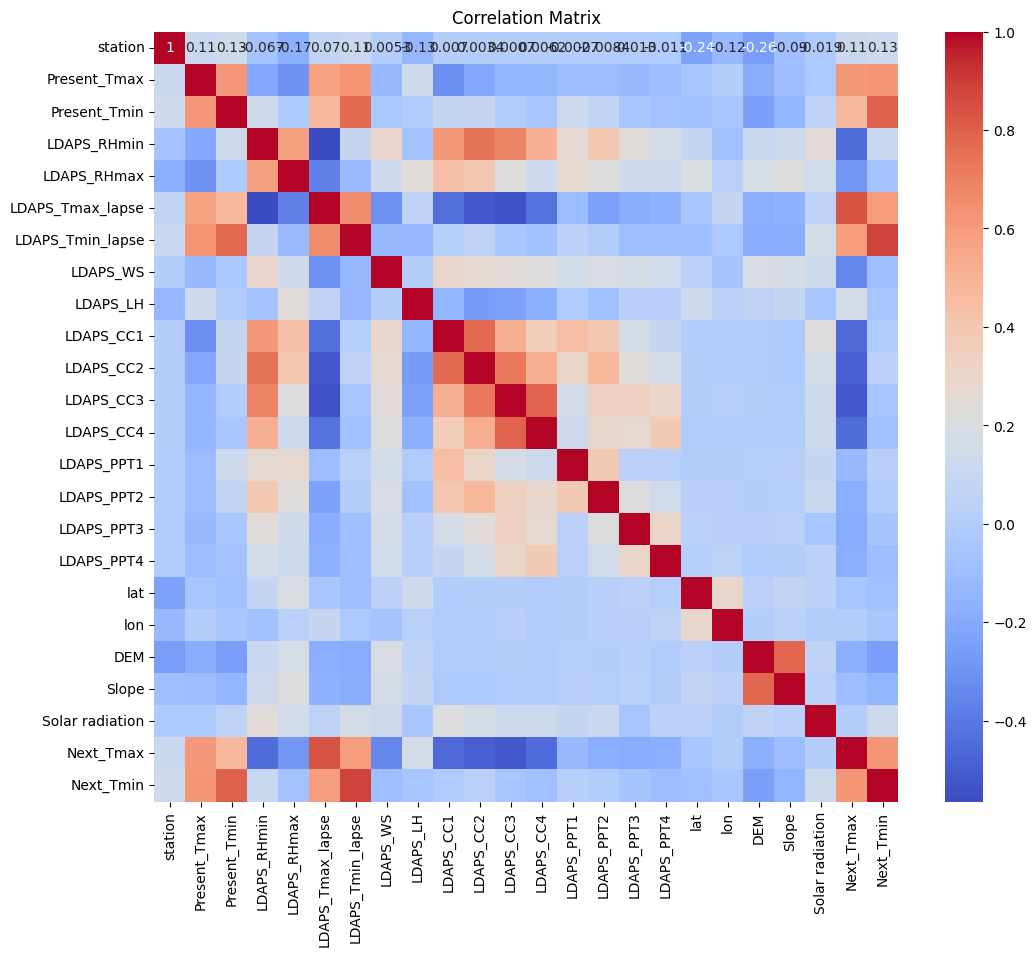

In [45]:
plt.figure(figsize=(12, 10))
numeric_columns = B.select_dtypes(include=[np.number])  
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler=StandardScaler()
scalered_features=scaler.fit_transform(B_cleaned[numeric_columns.columns])

In [52]:
B_scaled=pd.DataFrame(scalered_features,columns=numeric_columns.columns)

In [53]:
B_scaled.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,-1.663292,-0.361326,-0.759529,0.102515,0.383078,-0.524889,-0.216663,-0.128382,0.206966,-0.516243,...,-0.276489,-0.240636,-0.224453,1.189286,-0.005000,2.772243,1.115004,1.517935,-0.376282,-0.697599
1,-1.524648,0.721084,-0.676296,-0.308027,0.311586,0.080895,0.223848,-0.646994,-0.314841,-0.548557,...,-0.276489,-0.240636,-0.224453,1.189286,0.511177,-0.315157,-0.542158,1.229950,0.072097,-0.174064
2,-1.386005,0.619608,0.031188,-0.552814,-0.614982,0.162936,0.451210,-0.441604,-1.249283,-0.610450,...,-0.276489,-0.240636,-0.224453,0.653021,0.838510,-0.526218,-0.723133,1.216534,0.264260,0.389744
3,-1.247362,0.754909,0.072805,0.101426,1.133054,0.031092,-0.079874,-0.666247,0.095997,-0.583539,...,-0.276489,-0.240636,-0.224453,1.991696,0.385280,-0.297588,0.932424,1.201176,0.456422,0.550832
4,-1.108718,0.551957,-0.551446,-0.040098,0.248765,-0.170325,-0.011187,-0.627154,1.354409,-0.832287,...,-0.276489,-0.240636,-0.224453,0.118743,1.807917,-0.494322,-0.548433,1.207205,0.296287,-0.174064


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
targets = ['Next_Tmax', 'Next_Tmin']

In [58]:
X=B_cleaned.drop(columns=['Date','station', 'Next_Tmax', 'Next_Tmin'])
y=B_cleaned[targets]

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Training data size : ",X_train.shape)
print('Testing data size',X_test.shape)

Training data size :  (6201, 21)
Testing data size (1551, 21)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)

linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [63]:
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

In [ ]:
y_pred_linear

array([[28.8, 20.9],
       [35. , 27.2],
       [25.4, 20.9],
       ...,
       [29.5, 22.9],
       [25.7, 20.3],
       [26.7, 21.9]])

In [71]:
y_pred_tree

array([[28.8, 20.9],
       [35. , 27.2],
       [25.4, 20.9],
       ...,
       [29.5, 22.9],
       [25.7, 20.3],
       [26.7, 21.9]])

In [64]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [65]:
print("Linear Regression Model Performance:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R² Score: {r2_linear}")
print("\n")

Linear Regression Model Performance:
Mean Squared Error: 1.6161596375936322
R² Score: 0.8065295075362127




In [66]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

In [ ]:
print("Decision Tree Model Performance:")
print(f"Mean Squared Error: {mse_tree}")
print(f"R² Score: {r2_tree}")
print("\n")

Decision Tree Model Performance:
Mean Squared Error: 2.018836634541035
R² Score: 0.7528297978131351




In [72]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [73]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)


In [75]:
random_forest_model.fit(X_train, y_train['Next_Tmax'])
gradient_boosting_model.fit(X_train, y_train['Next_Tmax'])
xgb_model.fit(X_train, y_train['Next_Tmax'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [78]:
y_pred_rf = random_forest_model.predict(X_test)
y_pred_gb = gradient_boosting_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

In [80]:
mse_rf = mean_squared_error(y_test['Next_Tmax'], y_pred_rf)
r2_rf = r2_score(y_test['Next_Tmax'], y_pred_rf)

mse_gb = mean_squared_error(y_test['Next_Tmax'], y_pred_gb)
r2_gb = r2_score(y_test['Next_Tmax'], y_pred_gb)

mse_xgb = mean_squared_error(y_test['Next_Tmax'], y_pred_xgb)
r2_xgb = r2_score(y_test['Next_Tmax'], y_pred_xgb)

In [ ]:

print("Random Forest Model Performance:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R² Score: {r2_rf}")
print("\n")

print("Gradient Boosting Model Performance:")
print(f"Mean Squared Error: {mse_gb}")
print(f"R² Score: {r2_gb}")
print("\n")

print("XGBoost Model Performance:")
print(f"Mean Squared Error: {mse_xgb}")
print(f"R² Score: {r2_xgb}")

print("\n--------------------------------------------------")
print("Decision Tree Model Performance:")
print(f"Mean Squared Error: {mse_tree}")
print(f"R² Score: {r2_tree}")
print("\n")
print("Linear Regression Model Performance:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R² Score: {r2_linear}")
print("\n")

Random Forest Model Performance:
Mean Squared Error: 0.9046657525238984
R² Score: 0.9073740582162293


Gradient Boosting Model Performance:
Mean Squared Error: 1.443352342003827
R² Score: 0.8522195964300263


XGBoost Model Performance:
Mean Squared Error: 0.7614840732916902
R² Score: 0.9220339896307488

--------------------------------------------------
Decision Tree Model Performance:
Mean Squared Error: 2.018836634541035
R² Score: 0.7528297978131351


Linear Regression Model Performance:
Mean Squared Error: 1.6161596375936322
R² Score: 0.8065295075362127




In [84]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [85]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
243 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
203 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [86]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R² Score: 0.889762596093718


In [87]:
optimized_rf_model = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

In [88]:
optimized_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_optimized_rf = optimized_rf_model.predict(X_test)

# Evaluate the optimized model
mse_optimized_rf = mean_squared_error(y_test, y_pred_optimized_rf)
r2_optimized_rf = r2_score(y_test, y_pred_optimized_rf)


In [89]:
print("Optimized Random Forest Model Performance:")
print(f"Mean Squared Error: {mse_optimized_rf}")
print(f"R² Score: {r2_optimized_rf}")


Optimized Random Forest Model Performance:
Mean Squared Error: 0.6961817470490167
R² Score: 0.9135247186366289


In [90]:
import joblib

joblib.dump(optimized_rf_model, 'optimized_random_forest_model.pkl')

print("The optimized model has been saved successfully.")


The optimized model has been saved successfully.


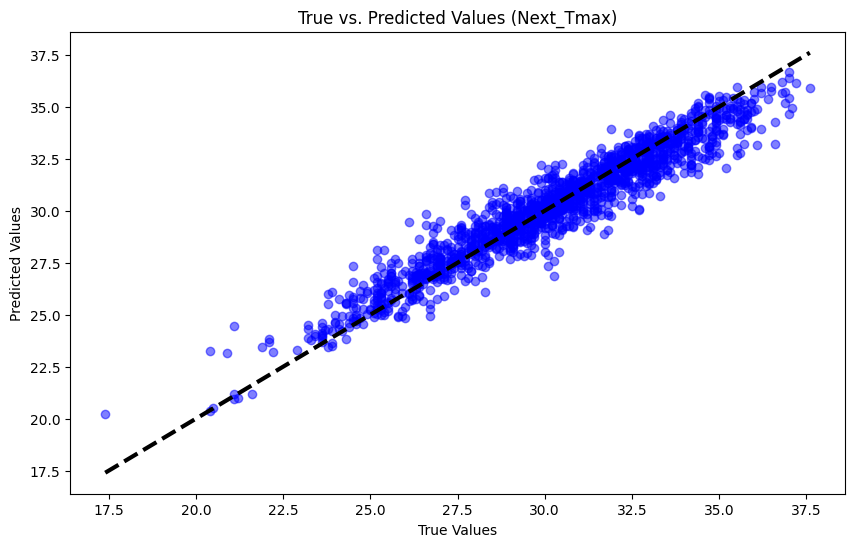

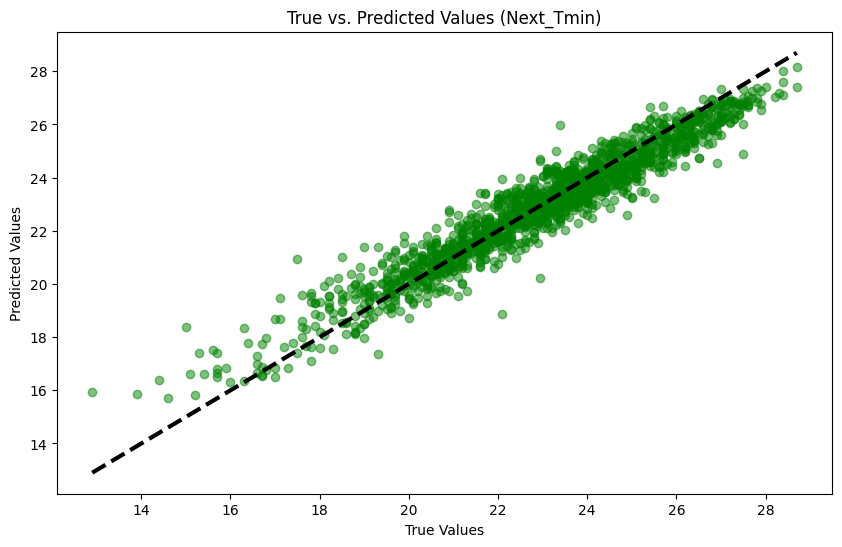

In [91]:
import matplotlib.pyplot as plt

y_pred_optimized_rf = optimized_rf_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test['Next_Tmax'], y_pred_optimized_rf[:, 0], alpha=0.5, color='blue')
plt.plot([y_test['Next_Tmax'].min(), y_test['Next_Tmax'].max()], [y_test['Next_Tmax'].min(), y_test['Next_Tmax'].max()], 'k--', lw=3)
plt.title('True vs. Predicted Values (Next_Tmax)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test['Next_Tmin'], y_pred_optimized_rf[:, 1], alpha=0.5, color='green')
plt.plot([y_test['Next_Tmin'].min(), y_test['Next_Tmin'].max()], [y_test['Next_Tmin'].min(), y_test['Next_Tmin'].max()], 'k--', lw=3)
plt.title('True vs. Predicted Values (Next_Tmin)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


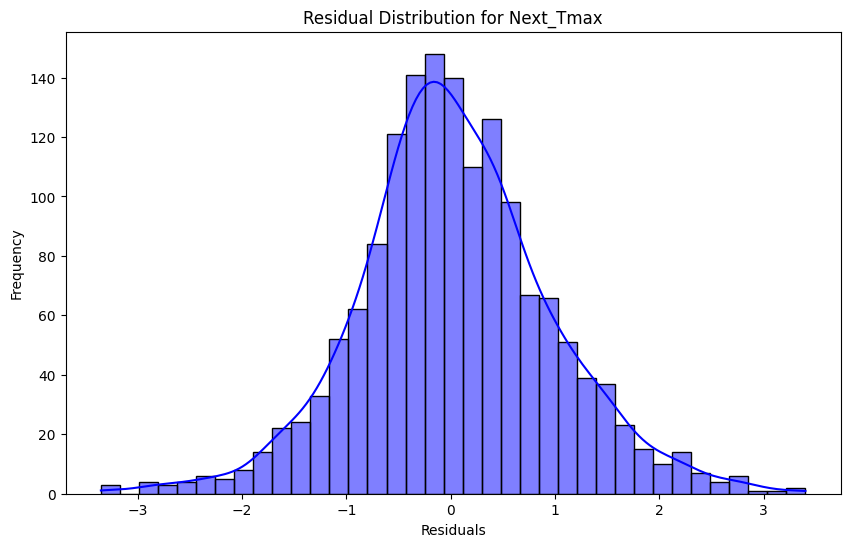

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


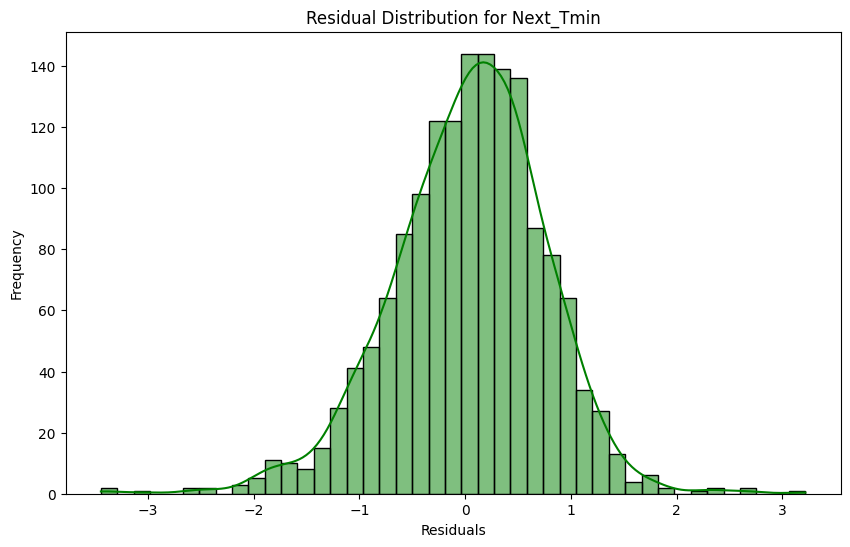

In [92]:
import seaborn as sns

residuals_tmax = y_test['Next_Tmax'] - y_pred_optimized_rf[:, 0]
residuals_tmin = y_test['Next_Tmin'] - y_pred_optimized_rf[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(residuals_tmax, kde=True, color='blue')
plt.title('Residual Distribution for Next_Tmax')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals_tmin, kde=True, color='green')
plt.title('Residual Distribution for Next_Tmin')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [93]:
import json

evaluation_results = {
    "R2_Score": r2_optimized_rf,
    "Mean_Squared_Error": mse_optimized_rf
}

with open("evaluation_results.json", "w") as f:
    json.dump(evaluation_results, f)

print("Model evaluation results saved successfully.")


Model evaluation results saved successfully.
